In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.datasets import load_iris

%matplotlib inline

In [3]:
iris = load_iris()

In [4]:
features = pd.DataFrame(iris.data, columns=iris.feature_names)
target = pd.DataFrame(iris.target, columns=['Classes'])
data = pd.concat([features, target], axis=1)

In [5]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Classes
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
class_2 = []
for i, v in enumerate(data.Classes):
    if v == 2:
        class_2.append(i)

data1 = data

In [16]:
for i in class_2:
    data1.drop([i], inplace=True)

In [17]:
data1 = data1.drop(['sepal width (cm)','petal width (cm)'],axis=1)

In [18]:
X = np.array(data1.iloc[:,:-1])
Y = np.array(data1.iloc[:,-1])

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2)

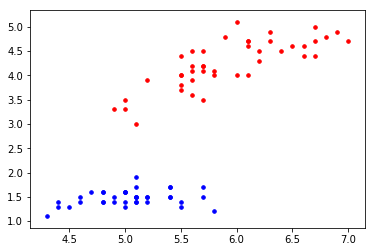

In [20]:
for i in range(len(ytrain)):
    if ytrain[i] == 1:
        plt.scatter(xtrain[i][0], xtrain[i][1], marker='.', c='r', s=50)
    else:
        plt.scatter(xtrain[i][0], xtrain[i][1], marker='.', c='b', s=50)
        
plt.show()

In [24]:
postiveX=[]
negativeX=[]
for i,v in enumerate(ytrain):
    if v==-1:
        negativeX.append(xtrain[i])
    else:
        postiveX.append(xtrain[i])

data_dict = {-1:np.array(negativeX), 1:np.array(postiveX)}
# print(data_dict)

In [25]:
w=[] #weights 2 dimensional vector
b=[] #bias

for yi in data_dict:
    print(yi)
    max_feature_value=np.amax(data_dict[yi])            
    min_feature_value=np.amin(data_dict[yi])
    print(max_feature_value)
    print(min_feature_value)
        
learning_rate = [max_feature_value * 0.1, max_feature_value * 0.01]
# , max_feature_value * 0.01

-1
5.8
1.1
1
7.0
3.0


In [26]:
colors = {1:'r',-1:'b'}

In [31]:
def train(data, w, b, learning_rate):
    opt_dict = {}
    transforms = [[1,1],[-1,1],[-1,-1],[1,-1]]
    
    b_range_multiple = 5
    b_multiple = 5
    w_optimum = max_feature_value*20
    for step in learning_rate:
        w = np.array([w_optimum,w_optimum])
        optimized = False
        while not optimized:
            for b in np.arange(-1*(max_feature_value*b_range_multiple), max_feature_value*b_range_multiple, step*b_multiple):
                for transformations in transforms:
                    w_t = w*transformations
                    found_option = True

                    for yi in data:
                        for xi in data[yi]:
                            if not yi*(np.dot(w_t,xi)+b) >= 1:
                                found_option = False
                    if found_option:
                        opt_dict[np.linalg.norm(w_t)] = [w_t,b]
            
            if w[0] < 0:
                optimized = True
                print("optimized a step")
            else:
                w = w - step
        norms = sorted([n for n in opt_dict])
        opt_choice = opt_dict[norms[0]]

        w = opt_choice[0]
        b = opt_choice[1]

        latest_optimum = opt_choice[0][0] + step*2
    
    return w, b

In [32]:
def predict(features,w,b):
    classification = np.sign(np.dot(np.array(features),w ) + b)

    if classification != 0 and visualization:
        ax.scatter(features[0], features[1], s=10, marker='*', c=colors[classification])

    return classification

In [33]:
def visualize(data_dict, w, b):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    [[ax.scatter(x[0], x[1], s=10, color=colors[i]) for x in data_dict[i]] for i in data_dict]

    def hyperplane(x,w,b,v):
        return (-w[0]*x - b + v ) / w[1]

    datarange = (min_feature_value*0.9, max_feature_value*1.1)

    hyp_x_min = datarange[0]
    hyp_x_max = datarange[1]

    psv1 = hyperplane(hyp_x_min, w, b, 1)
    psv2 = hyperplane(hyp_x_max, w, b, 1)

    ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], 'k')

    ################################################

    nsv1 = hyperplane(hyp_x_min, w, b, -1)
    nsv2 = hyperplane(hyp_x_max, w, b, -1)

    ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], 'k')

    ################################################

    db1 = hyperplane(hyp_x_min, w, b, 0)
    db2 = hyperplane(hyp_x_max, w, b, 0)

    ax.plot([hyp_x_min, hyp_x_max], [db1, db2], 'y--') 

    plt.show()

In [34]:
we, bi = train(data_dict, w, b, learning_rate)

optimized a step


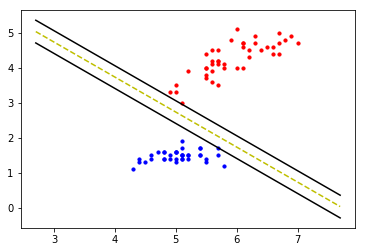

[3.08 3.08]
-23.799999999999955


In [35]:
visualize(data_dict, we, bi)
print(we)
print(bi)

In [36]:
predict(xtest, we, bi)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()